In [1]:
# Import our dependencies
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import time

import os

# Upload and read the csv files
ais_df = pd.read_csv("ml_data_daily_2018.csv", index_col=0)

In [2]:
# Fix a random seed so the data can be reproduced
np.random.seed(24)

In [3]:
# Look at our data
ais_df.head()

,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable
2018/01/01,9,37,145,44,27,13,12,7
2018/01/02,13,45,119,41,27,14,19,10
2018/01/03,13,44,106,40,36,14,20,11
2018/01/04,15,44,103,45,30,10,15,12
2018/01/05,10,45,107,41,26,13,21,10


In [4]:
# # Renaming the "Unnamed:0" column to "Date"
# ais_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
# ais_df.head()

In [5]:
# Check the info of the DataFrame to see the type of data in each column and to make sure we have clean data
# ais_df.info()

In [6]:
# # Convert "Date" to datetime
# ais_df['Date']=pd.to_datetime(ais_df['Date'])

# # And recheck info
# ais_df.info()

In [7]:
# Creating a total column for our data
ais_df['Total']= ais_df.sum(numeric_only=True, axis=1)
ais_df.head()

,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable,Total
2018/01/01,9,37,145,44,27,13,12,7,294
2018/01/02,13,45,119,41,27,14,19,10,288
2018/01/03,13,44,106,40,36,14,20,11,284
2018/01/04,15,44,103,45,30,10,15,12,274
2018/01/05,10,45,107,41,26,13,21,10,273


In [8]:
# Check the info one last time now that we have our new column
ais_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2018/01/01 to 2018/12/31
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Fishing       365 non-null    int64
 1   TugTow        365 non-null    int64
 2   Recreational  365 non-null    int64
 3   Passenger     365 non-null    int64
 4   Cargo         365 non-null    int64
 5   Tanker        365 non-null    int64
 6   Other         365 non-null    int64
 7   Unavailable   365 non-null    int64
 8   Total         365 non-null    int64
dtypes: int64(9)
memory usage: 28.5+ KB


In [9]:
# Convert the values in the DataFrame to floating point values, which will help with the Neural Network,
ais_df = ais_df.astype('float32')

# And then check the type
ais_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2018/01/01 to 2018/12/31
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fishing       365 non-null    float32
 1   TugTow        365 non-null    float32
 2   Recreational  365 non-null    float32
 3   Passenger     365 non-null    float32
 4   Cargo         365 non-null    float32
 5   Tanker        365 non-null    float32
 6   Other         365 non-null    float32
 7   Unavailable   365 non-null    float32
 8   Total         365 non-null    float32
dtypes: float32(9)
memory usage: 15.7+ KB


In [10]:
# Create nine DataFrames, each with the Date and one unique column:

# Fishing
#ais_fishing_df = ais_df.loc[:, ['Date', 'Fishing']]
ais_fishing_df = ais_df.loc[:, ['Fishing']]
# TugTow
#ais_tugtow_df = ais_df.loc[:, ['Date', 'TugTow']]
ais_tugtow_df = ais_df.loc[:, ['TugTow']]
# Recreational
#ais_recreational_df = ais_df.loc[:, ['Date', 'Recreational']]
ais_recreational_df = ais_df.loc[:, ['Recreational']]
# Passenger
#ais_passenger_df = ais_df.loc[:, ['Date', 'Passenger']]
ais_passenger_df = ais_df.loc[:, ['Passenger']]
# Cargo
#ais_cargo_df = ais_df.loc[:, ['Date', 'Cargo']]
ais_cargo_df = ais_df.loc[:, ['Cargo']]
# Tanker
#ais_tanker_df = ais_df.loc[:, ['Date', 'Tanker']]
ais_tanker_df = ais_df.loc[:, ['Tanker']]
# Other
#ais_other_df = ais_df.loc[:, ['Date', 'Other']]
ais_other_df = ais_df.loc[:, ['Other']]
# Unavailable
#ais_unavailable_df = ais_df.loc[:, ['Date', 'Unavailable']]
ais_unavailable_df = ais_df.loc[:, ['Unavailable']]
# Total
#ais_total_df = ais_df.loc[:, ['Date', 'Total']]
ais_total_df = ais_df.loc[:, ['Total']]

In [11]:
# From here we will be using 'Total' as an example, and repeating the code for the rest of the data

# Check the new Dataframe
ais_total_df

,Total
2018/01/01,294.0
2018/01/02,288.0
2018/01/03,284.0
2018/01/04,274.0
2018/01/05,273.0
...,...
2018/12/27,298.0
2018/12/28,298.0
2018/12/29,306.0
2018/12/30,308.0


In [12]:
# Normalize the data by using a scaler
scaler = MinMaxScaler(feature_range=(0, 1))
ais_total_df = scaler.fit_transform(ais_total_df)

In [13]:
ais_total_df.shape

(365, 1)

In [14]:
# # Split our data into training and testing, using slicing

# #total_val_ind = int(len(ais_total_df)*0.8)
# total_train_size = int(len(ais_total_df)*0.75)

# total_train_df = ais_total_df[:total_train_size]
# total_test_df = ais_total_df[total_train_size:]

# #total_val_df = ais_total_df[total_val_ind:total_train_ind]

In [15]:
# #Check out the datasets
# print(len(total_train_df), len(total_test_df))
# #print(total_val_df)


In [16]:
# # Convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
#     dataX, dataY = [], []
#     for i in range(len(dataset)-look_back-1):
#         a = dataset[i:(i+look_back), 0]
#         dataX.append(a)
#         dataY.append(dataset[i + look_back, 0])
#     return np.array(dataX), np.array(dataY)


In [17]:
# # Reshape the values into X=t and Y=t+1
# look_back = 1
# total_train_X, total_train_Y = create_dataset(total_train_df, look_back)
# total_test_X, total_test_Y = create_dataset(total_test_df, look_back)

In [18]:
# # Reshape the data to incorperate into the LSTM
# total_train_X = np.reshape(total_train_X, (total_train_X.shape[0], 1, total_train_X.shape[1]))
# total_test_X = np.reshape(total_test_X, (total_test_X.shape[0], 1, total_test_X.shape[1]))

In [19]:
#total_train_X.shape

In [20]:
# Create the LSTM Model

model = Sequential()

# Recurrent layer
model.add(LSTM(4, input_dim=1))

# Fully connected layer
model.add(Dense(1))

# Dropout for regularization
#model.add(Dropout(0.2))

# Output layer
#model.add(Dense(units=1, activation='softmax'))

# Recurrent layer
#model.add(LSTM(292, activation='relu', input_shape=(total_train_df.shape[0], total_train_df.shape[1]), return_sequences=False, dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
#model.add(Dense(units=64, activation='relu'))

In [21]:
# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])

In [23]:
# Train the model
fit_model = model.fit(ais_total_df, ais_total_df, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
365/365 - 2s - loss: 0.0433 - mse: 0.0433 - mae: 0.1590 - mape: 567062.8125 - 2s/epoch - 6ms/step
Epoch 2/20
365/365 - 1s - loss: 0.0103 - mse: 0.0103 - mae: 0.0816 - mape: 615719.6875 - 619ms/epoch - 2ms/step
Epoch 3/20
365/365 - 1s - loss: 0.0061 - mse: 0.0061 - mae: 0.0629 - mape: 487228.9688 - 735ms/epoch - 2ms/step
Epoch 4/20
365/365 - 1s - loss: 0.0029 - mse: 0.0029 - mae: 0.0425 - mape: 429519.4375 - 654ms/epoch - 2ms/step
Epoch 5/20
365/365 - 1s - loss: 9.9100e-04 - mse: 9.9100e-04 - mae: 0.0241 - mape: 270260.6875 - 644ms/epoch - 2ms/step
Epoch 6/20
365/365 - 1s - loss: 2.1657e-04 - mse: 2.1657e-04 - mae: 0.0106 - mape: 134796.7031 - 612ms/epoch - 2ms/step
Epoch 7/20
365/365 - 1s - loss: 3.5577e-05 - mse: 3.5577e-05 - mae: 0.0036 - mape: 108328.5469 - 627ms/epoch - 2ms/step
Epoch 8/20
365/365 - 1s - loss: 1.1960e-05 - mse: 1.1960e-05 - mae: 0.0020 - mape: 67591.4062 - 619ms/epoch - 2ms/step
Epoch 9/20
365/365 - 1s - loss: 1.0134e-05 - mse: 1.0134e-05 - mae: 0.0022 -

In [24]:
fit_model.history.keys()

dict_keys(['loss', 'mse', 'mae', 'mape'])

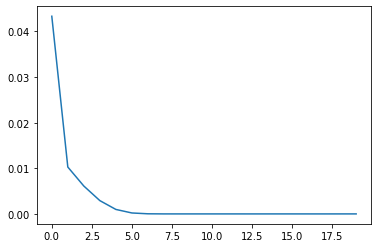

In [25]:
plt.plot(fit_model.history["loss"])

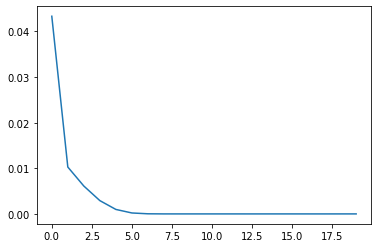

In [26]:
plt.plot(fit_model.history["mse"])

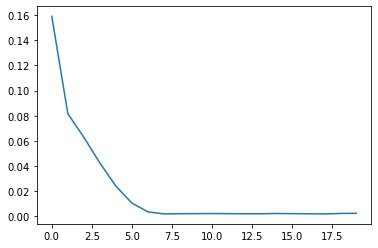

In [27]:
plt.plot(fit_model.history["mae"])

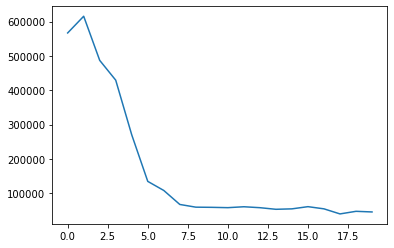

In [28]:
plt.plot(fit_model.history["mape"])

In [29]:
# for x in fit_model.history.keys():
#     plt.plot(fit_model.history[x])